# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

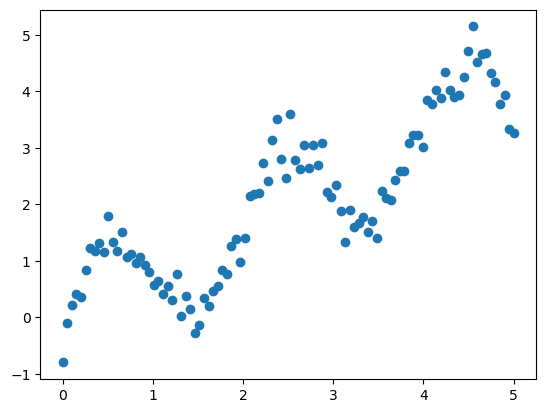

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5668766855595124


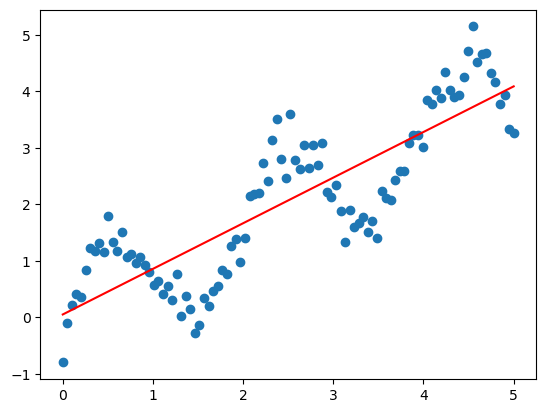

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [11]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [12]:
regr_poly = LinearRegression()

In [13]:
regr_poly.fit(X_poly, y)

LinearRegression()

MSE: 0.5307744740548678


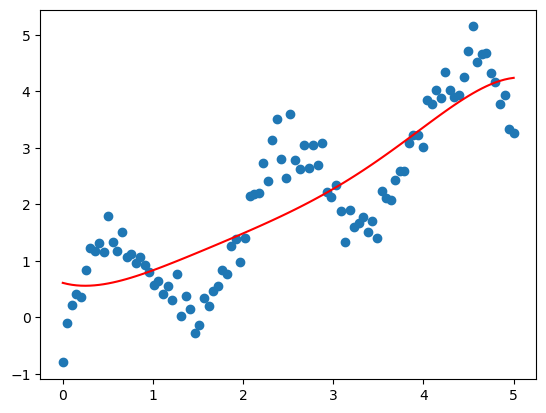

In [20]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

Y_poly = regr_poly.predict(X_poly)
mse_poly = np.sum((Y_poly-y)**2) / len(y)
print("MSE:", mse_poly)

In [15]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-0.44090249  1.06075717 -0.50382419  0.11586915 -0.00964041]
interception:  0.6108382906906495


In [16]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.61083829, 0.59121207, 0.57661835, 0.56669436, 0.56109466,
       0.55949076, 0.56157077, 0.56703895, 0.5756154 , 0.58703565,
       0.60105028, 0.61742453, 0.63593796, 0.656384  , 0.67856965,
       0.70231505, 0.72745309, 0.75382909, 0.78130035, 0.80973581,
       0.83901567, 0.86903098, 0.8996833 , 0.93088429, 0.96255535,
       0.99462722, 1.0270396 , 1.05974081, 1.09268735, 1.12584357,
       1.15918125, 1.19267926, 1.22632315, 1.26010477, 1.2940219 ,
       1.32807789, 1.36228123, 1.39664521, 1.43118755, 1.46592995,
       1.5008978 , 1.53611974, 1.5716273 , 1.60745451, 1.64363755,
       1.68021431, 1.71722409, 1.75470714, 1.79270433, 1.83125677,
       1.8704054 , 1.91019063, 1.95065195, 1.99182757, 2.03375402,
       2.07646577, 2.11999485, 2.1643705 , 2.20961874, 2.25576203,
       2.30281886, 2.3508034 , 2.3997251 , 2.44958831, 2.50039191,
       2.55212892, 2.60478613, 2.6583437 , 2.7127748 , 2.76804524,
       2.82411305, 2.88092813, 2.93843188, 2.99655678, 3.05522

In [17]:
regr_poly.predict(X_poly)

array([0.61083829, 0.59121207, 0.57661835, 0.56669436, 0.56109466,
       0.55949076, 0.56157077, 0.56703895, 0.5756154 , 0.58703565,
       0.60105028, 0.61742453, 0.63593796, 0.656384  , 0.67856965,
       0.70231505, 0.72745309, 0.75382909, 0.78130035, 0.80973581,
       0.83901567, 0.86903098, 0.8996833 , 0.93088429, 0.96255535,
       0.99462722, 1.0270396 , 1.05974081, 1.09268735, 1.12584357,
       1.15918125, 1.19267926, 1.22632315, 1.26010477, 1.2940219 ,
       1.32807789, 1.36228123, 1.39664521, 1.43118755, 1.46592995,
       1.5008978 , 1.53611974, 1.5716273 , 1.60745451, 1.64363755,
       1.68021431, 1.71722409, 1.75470714, 1.79270433, 1.83125677,
       1.8704054 , 1.91019063, 1.95065195, 1.99182757, 2.03375402,
       2.07646577, 2.11999485, 2.1643705 , 2.20961874, 2.25576203,
       2.30281886, 2.3508034 , 2.3997251 , 2.44958831, 2.50039191,
       2.55212892, 2.60478613, 2.6583437 , 2.7127748 , 2.76804524,
       2.82411305, 2.88092813, 2.93843188, 2.99655678, 3.05522

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [21]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [22]:
sigma = 0.3

In [23]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [24]:
regr_rbf = LinearRegression()

In [25]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

MSE: 0.27488168496285115


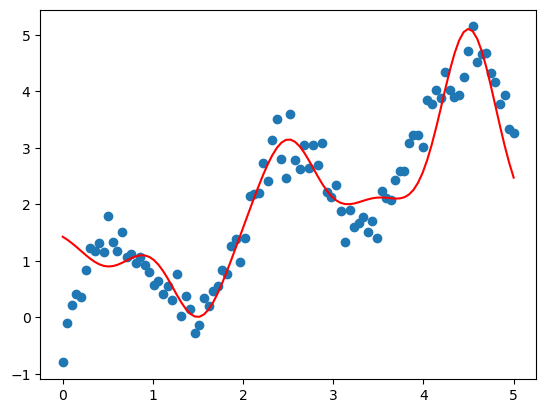

In [27]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

Y_rbf = regr_rbf.predict(X_rbf)
mse_rbf = np.sum((Y_rbf-y)**2) / len(y)
print("MSE:", mse_rbf)

In [28]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.69200073 -1.59565372  1.55449446  0.50242757  3.50488163]
interception:  1.599102665563304


#### Comparison

In [29]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

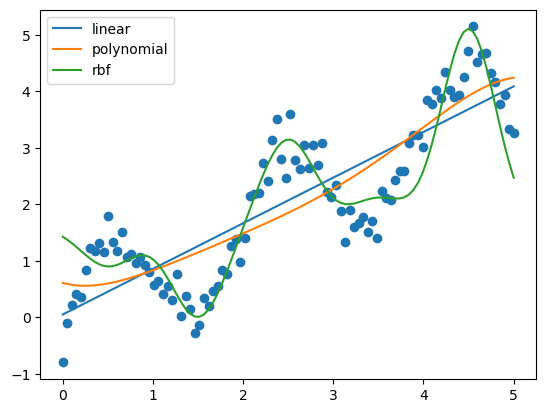

In [30]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [31]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5668766855595124


In [32]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5307744740548678


In [33]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.27488168496285115
